# Predicting the spread of Covid-9 for US for three weeks from 27th July, 2020

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### Read the active cases data from us.csv into pandas dataframe for exploration and analysis

In [3]:
us_cases = pd.read_csv('./datasets/us.csv')
us_cases.sample(20)

,date,cases,deaths
153,2020-06-22,2324879,120334
23,2020-02-13,15,0
45,2020-03-06,311,15
142,2020-06-11,2036500,113980
27,2020-02-17,25,0
28,2020-02-18,25,0
18,2020-02-08,12,0
4,2020-01-25,3,0
113,2020-05-13,1397726,84168
20,2020-02-10,13,0


### Visualize data

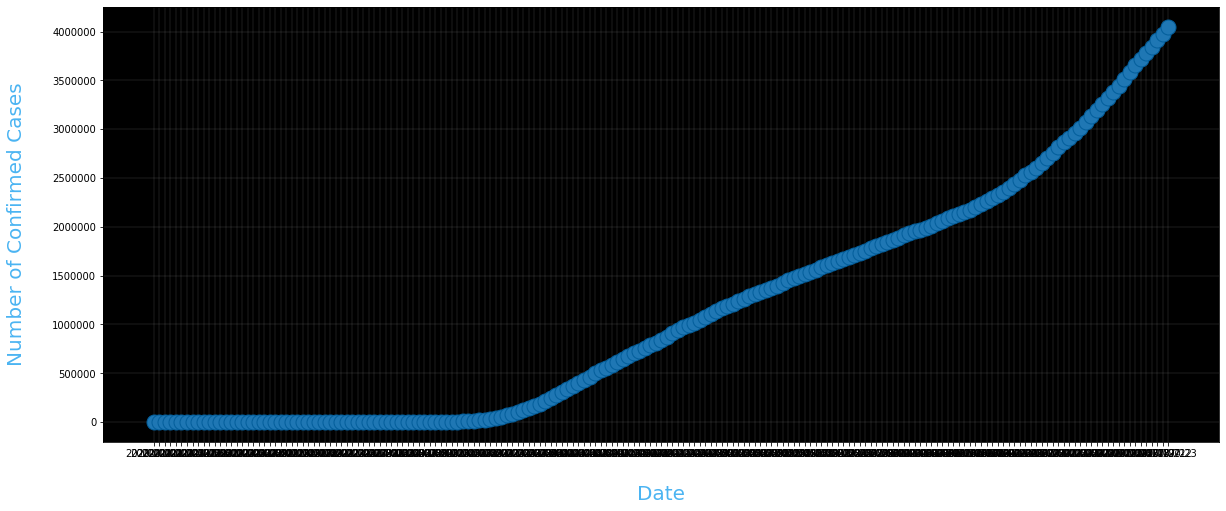

In [12]:
x,y = us_cases['date'].values, us_cases['cases'].values

plt.figure(figsize=(20,8)) 
  
ax = plt.axes() 
ax.grid(linewidth=0.2, color='#8f8f8f')  
  
ax.set_facecolor("black")  
ax.set_xlabel('\nDate',size=20,color='#4bb4f2') 
ax.set_ylabel('Number of Confirmed Cases\n', 
              size=20,color='#4bb4f2') 
  
ax.plot(x,y, 
        color='#1F77B4', 
        marker='o', 
        linewidth=4, 
        markersize=15, 
        markeredgecolor='#035E9B')

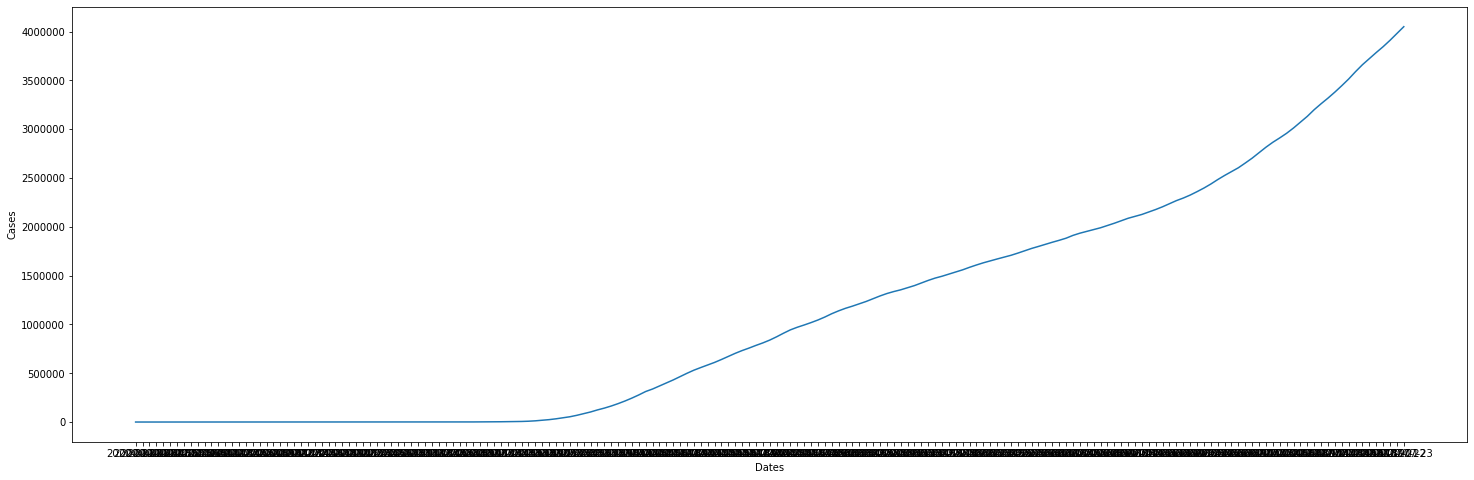

In [9]:
plt.figure(figsize=(25,8))
plt.plot(x, y)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.show()

### Split dataset into training and test

In [14]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (x_train.size, x_test.size))

Training cases: 129
Test cases: 56


### Modelling with LinearRegression

In [27]:
# train a regression model with LinearRegression
from sklearn.linear_model import LinearRegression

# convert x feature column from date to int
import datetime as dt

us_cases['date'] = pd.to_datetime(us_cases['date'])
us_cases['date'] = us_cases['date'].map(dt.datetime.toordinal)
x = us_cases['date'].values.reshape(-1, 1)

lr_model = LinearRegression().fit(x, y)

print(lr_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


### Predicting with model

In [31]:
X_test = pd.to_datetime(x_test)
X_test = pd.DataFrame(x_test).values.map(dt.datetime.toordinal)
# x = us_cases['date'].values.reshape(-1, 1)
predict_cases = lr_model.predict(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'map'